In [17]:
import numpy as np
import pandas as pd
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [19]:
# xóa cột
df = df.drop(['CustomerID','AdvertisingPlatform', 'AdvertisingTool',], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

In [21]:
#lựa chọn đặc trưng
columns_for_clustering = ['Age', 'Income','LoyaltyPoints','PreviousPurchases']
df_clustering = df[columns_for_clustering]

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndt04\AppData\Local\Temp\ipykernel_9176\2018256130.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndt04\AppData\Local\Temp\ipykernel_9176\2018256130.py:14: UserWarning: The figure layout has

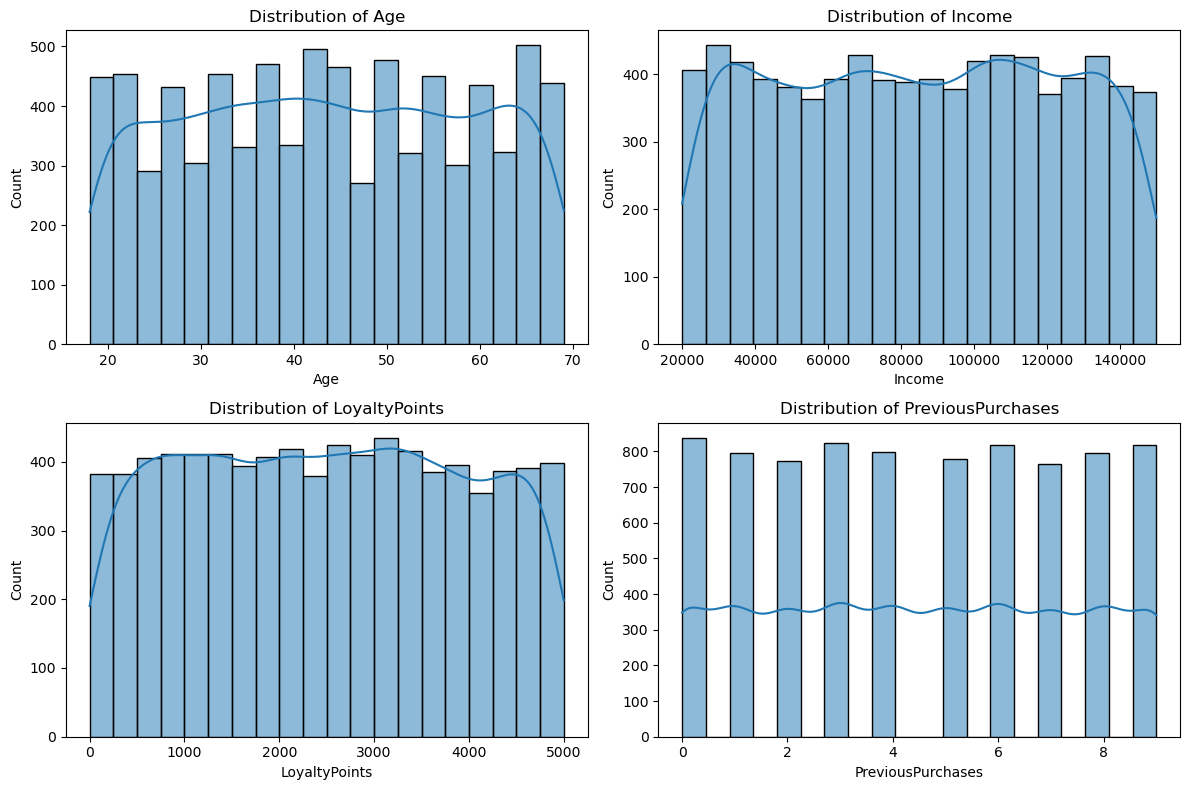

In [22]:
#1. Trực quan hóa phân phối của mỗi đặc trưng

import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Income', 'LoyaltyPoints', 'PreviousPurchases']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


In [23]:
#chuẩn hóa các đặc trưng
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
try:
    df_scaled = scaler.fit_transform(df_clustering) 
except Exception as e:
    print(f"Lỗi trong quá trình chuẩn hóa: {e}")

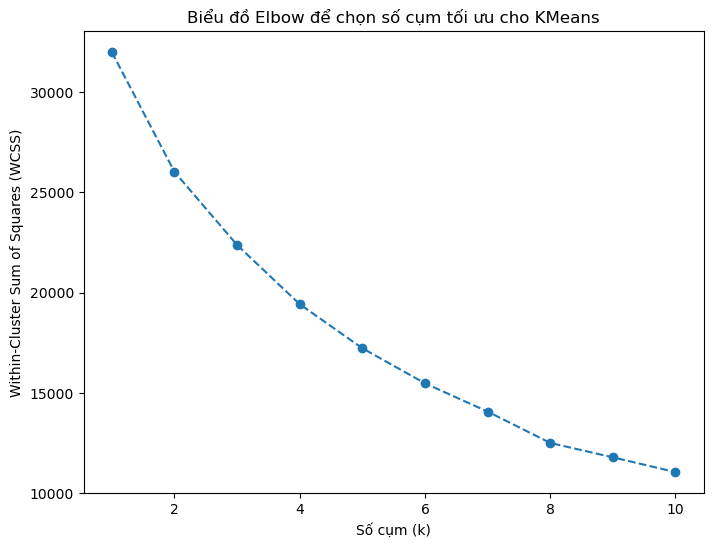

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) 

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Số cụm (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Biểu đồ Elbow để chọn số cụm tối ưu cho KMeans')
plt.show()


In [25]:
from sklearn.cluster import KMeans
k_optimal = 4

# Khởi tạo và huấn luyện mô hình KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

In [20]:
import pandas as pd

# Tóm tắt thông tin từng cụm
cluster_summary = df.groupby('Cluster_KMeans').mean(numeric_only=True)
cluster_summary['Count'] = df['Cluster_KMeans'].value_counts()

def highlight_alternate_rows(row):
    if row.name % 2 == 0: 
        return ['background-color: lightblue'] * len(row)
    else:
        return ['background-color: gray'] * len(row)

styled_table = cluster_summary.style.apply(highlight_alternate_rows, axis=1)
styled_table

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Count
Cluster_KMeans,,,,,,,,,,,,,,,
0,54.852443,83581.151047,4964.226676,0.157077,0.104852,24.664506,5.538256,7.661721,50.402293,9.601695,4.578764,4.279661,1095.681954,0.842473,2006
1,31.613896,120570.467990,5014.931691,0.155729,0.103778,24.866005,5.579548,7.850561,49.418362,9.355335,4.466005,4.519603,2444.834739,0.883871,2015
2,56.476072,85190.861914,5010.588125,0.154461,0.105917,24.705384,5.491561,7.642177,49.619641,9.556331,4.474576,4.513460,3811.786142,0.898804,2006
3,31.412570,48559.261531,5014.187935,0.151997,0.102987,24.770400,5.588338,7.756334,49.759757,9.393310,4.348201,4.631526,2610.960466,0.880892,1973


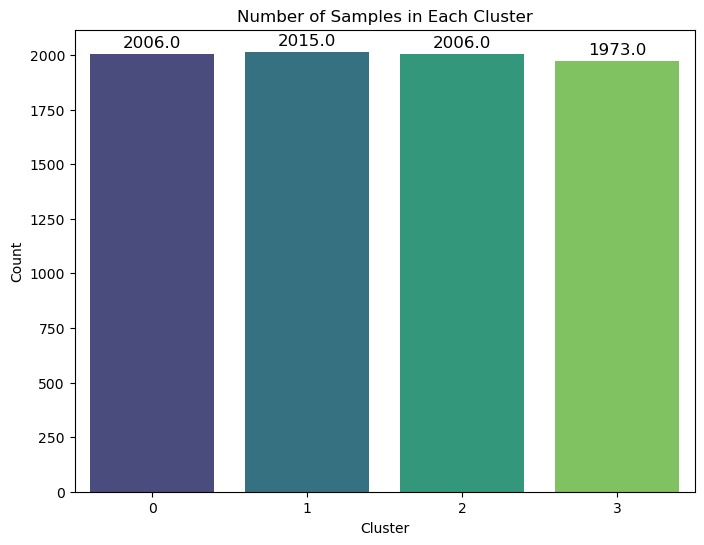

In [159]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Cluster_KMeans', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


Silhouette Score trung bình cho k = 4 là: 0.185


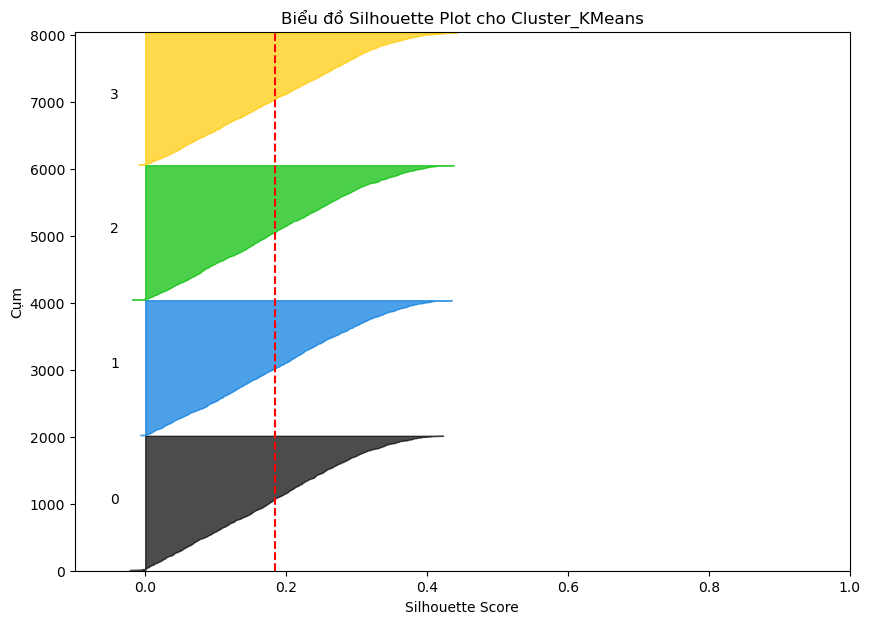

In [160]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
k=4
# Tính Silhouette Score tổng thể
silhouette_avg = silhouette_score(df_scaled, df['Cluster_KMeans'])
print(f"Silhouette Score trung bình cho k = {k} là: {silhouette_avg:.3f}")

# Tính Silhouette Score cho từng điểm dữ liệu
sample_silhouette_values = silhouette_samples(df_scaled, df['Cluster_KMeans'])

# Vẽ biểu đồ Silhouette Plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
y_lower = 10
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_scaled) + (k + 1) * 10])

for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster_KMeans'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("Biểu đồ Silhouette Plot cho Cluster_KMeans")
ax1.set_xlabel("Silhouette Score")
ax1.set_ylabel("Cụm")

plt.show()

In [92]:
#xuất dữ liệu
df.to_csv('clustered_data.csv', index=False)


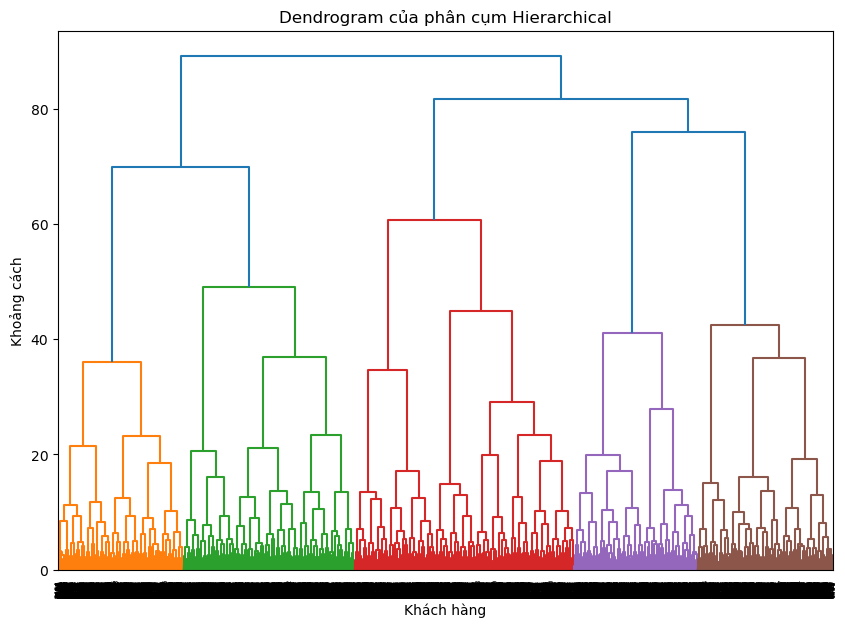

In [26]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt 
# Tạo biểu đồ dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram của phân cụm Hierarchical')
plt.xlabel('Khách hàng')
plt.ylabel('Khoảng cách')
plt.show()

In [27]:
# Từ Dendrogram chúng ta có thể thấy các cụm được phân rõ ràng nhất khi cắt ngang cây ở vị trí khoảng cách trên 60 tương ứng với k=5
from sklearn.cluster import AgglomerativeClustering

# chọn k= 5 từ dendrogram
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_Hierarchical'] = hierarchical.fit_predict(df_scaled)

In [28]:
import pandas as pd

# Tóm tắt thông tin từng cụm
cluster_summary = df.groupby('Cluster_Hierarchical').mean(numeric_only=True)
cluster_summary['Count'] = df['Cluster_Hierarchical'].value_counts()

def highlight_alternate_rows(row):
    if row.name % 2 == 0: 
        return ['background-color: lightblue'] * len(row)
    else:
        return ['background-color: gray'] * len(row)

styled_table = cluster_summary.style.apply(highlight_alternate_rows, axis=1)
styled_table

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Cluster_KMeans,Count
Cluster_Hierarchical,,,,,,,,,,,,,,,,
0,42.863516,120988.016784,5018.085649,0.156427,0.105130,24.857332,5.553272,7.812077,49.281360,9.512367,4.470406,3.723057,1914.493816,0.861307,0.790194,2264
1,56.248029,87165.470251,5011.865765,0.153620,0.107562,24.391398,5.604779,7.645228,50.460932,9.448029,4.444444,3.000000,3863.665233,0.884588,1.950538,1395
2,49.322781,62071.720746,4991.969072,0.156163,0.102554,24.866026,5.462006,7.789558,50.463539,9.525155,4.439796,7.182024,2035.922555,0.894856,1.397400,1769
3,28.593725,80119.558431,5054.979493,0.151189,0.102478,25.008627,5.523003,7.588487,49.056471,9.352157,4.440784,5.625882,3698.120784,0.903529,2.127059,1275
4,38.385505,53850.086353,4918.402351,0.155097,0.104061,24.545875,5.627604,7.721712,49.818813,9.502699,4.550501,2.615266,1450.478026,0.842714,1.736315,1297


Silhouette Score trung bình cho k = 5 là: 0.128


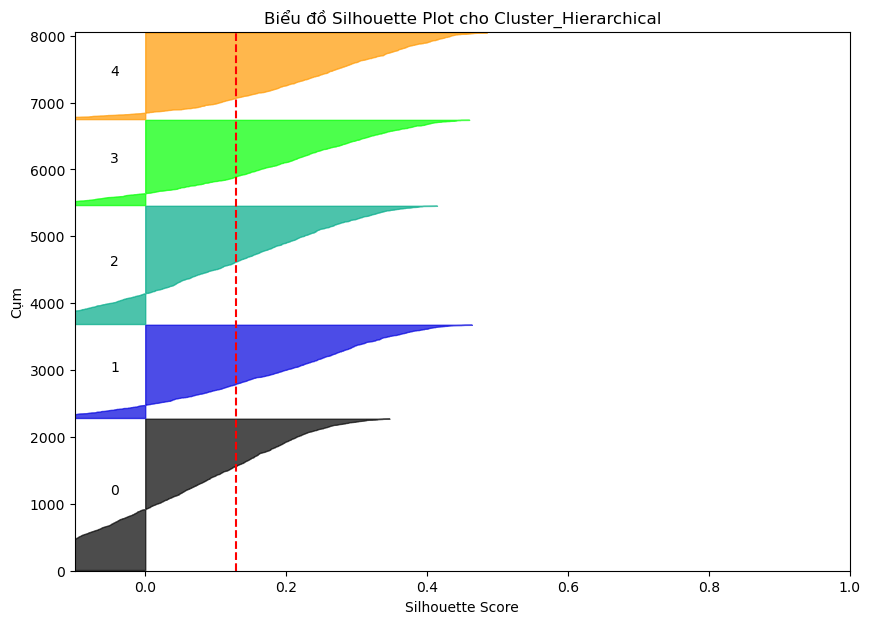

In [145]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
k=5
# Tính Silhouette Score tổng thể
silhouette_avg = silhouette_score(df_scaled, df['Cluster_Hierarchical'])
print(f"Silhouette Score trung bình cho k = {k} là: {silhouette_avg:.3f}")

# Tính Silhouette Score cho từng điểm dữ liệu
sample_silhouette_values = silhouette_samples(df_scaled, df['Cluster_Hierarchical'])

# Vẽ biểu đồ Silhouette Plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

y_lower = 10
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_scaled) + (k + 1) * 10])

for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Cluster_Hierarchical'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("Biểu đồ Silhouette Plot cho Cluster_Hierarchical")
ax1.set_xlabel("Silhouette Score")
ax1.set_ylabel("Cụm")

plt.show()

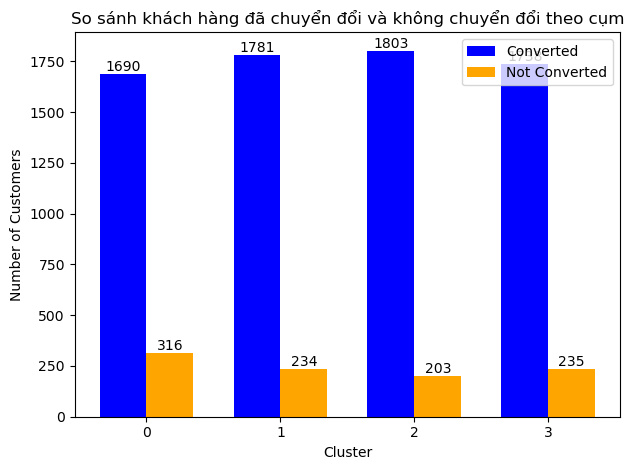

In [164]:
# Biểu đồ cột
bar_width = 0.35
x = range(len(x_labels))

bars1 = plt.bar(x, converted, width=bar_width, label="Converted", color="blue")
bars2 = plt.bar([i + bar_width for i in x], not_converted, width=bar_width, label="Not Converted", color="orange")

# Thêm số trên mỗi cột
for bar in bars1:  # Duyệt qua các cột "Converted"
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             str(bar.get_height()), ha="center", va="bottom", fontsize=10)

for bar in bars2:  # Duyệt qua các cột "Not Converted"
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             str(bar.get_height()), ha="center", va="bottom", fontsize=10)

# Tùy chỉnh biểu đồ
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("So sánh khách hàng đã chuyển đổi và không chuyển đổi theo cụm")
plt.xticks([i + bar_width / 2 for i in x], x_labels)
plt.legend()

plt.tight_layout()
plt.show()


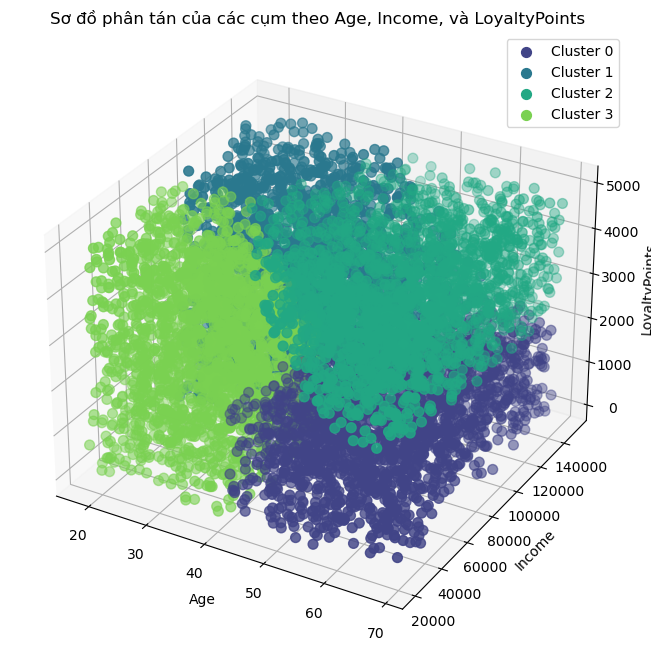

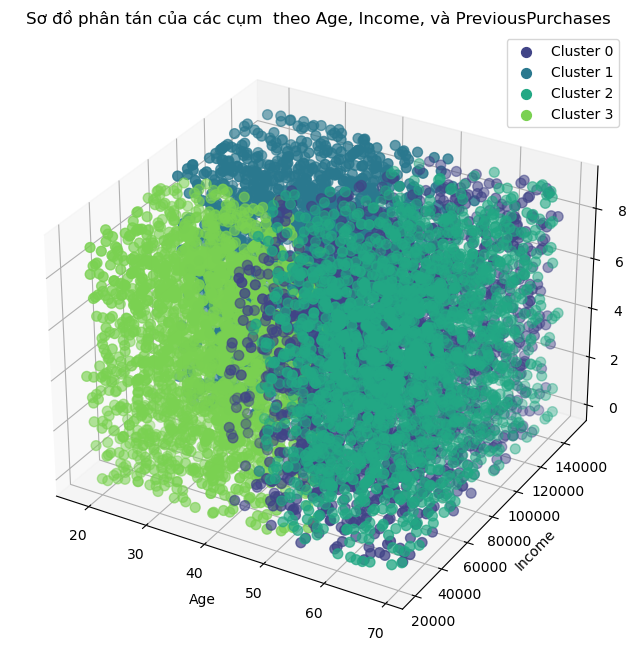

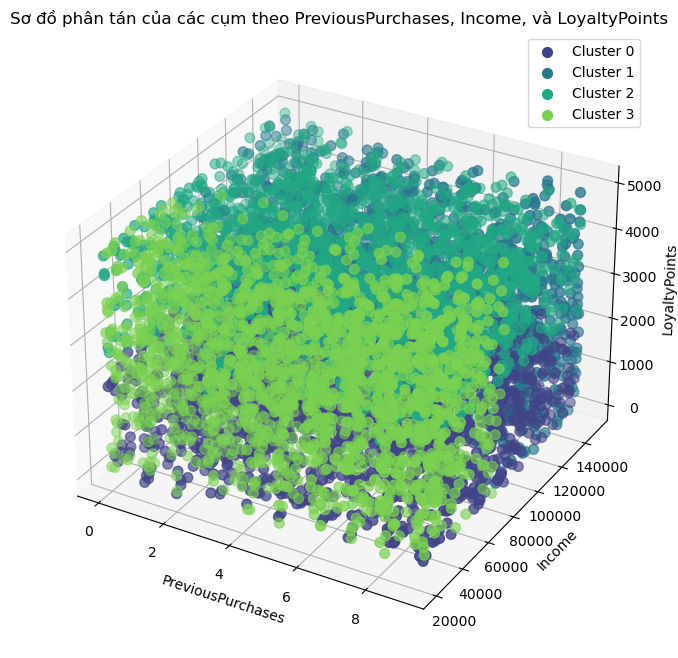

In [29]:
#từ chỉ số đánh giá hai mô hình phân cụm ta có thể thấy Kmean có chỉ số nhỉnh hơn một chút cũng như dữ liệu được chia khá đều ở hai cụm nên có thể chọn Kmean để phân cụm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette("viridis", 4)  

for cluster in sorted(df['Cluster_KMeans'].unique()):
    cluster_data = df[df['Cluster_KMeans'] == cluster] 
    ax.scatter(
        cluster_data['Age'], 
        cluster_data['Income'], 
        cluster_data['LoyaltyPoints'],
        color=colors[cluster], 
        label=f'Cluster {cluster}',
        s=50
    )

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('LoyaltyPoints')
ax.set_title('Sơ đồ phân tán của các cụm theo Age, Income, và LoyaltyPoints')
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette("viridis", 4)  
for cluster in sorted(df['Cluster_KMeans'].unique()):
    cluster_data = df[df['Cluster_KMeans'] == cluster] 
    ax.scatter(
        cluster_data['Age'], 
        cluster_data['Income'], 
        cluster_data['PreviousPurchases'],
        color=colors[cluster], 
        label=f'Cluster {cluster}',
        s=50
    )
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('PreviousPurchases')
ax.set_title('Sơ đồ phân tán của các cụm  theo Age, Income, và PreviousPurchases')
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette("viridis", 4) 
for cluster in sorted(df['Cluster_KMeans'].unique()):
    cluster_data = df[df['Cluster_KMeans'] == cluster]
    ax.scatter(
        cluster_data['PreviousPurchases'], 
        cluster_data['Income'], 
        cluster_data['LoyaltyPoints'],
        color=colors[cluster], 
        label=f'Cluster {cluster}',
        s=50
    )
ax.set_xlabel('PreviousPurchases')
ax.set_ylabel('Income')
ax.set_zlabel('LoyaltyPoints')
ax.set_title('Sơ đồ phân tán của các cụm theo PreviousPurchases, Income, và LoyaltyPoints')
ax.legend()
plt.show()
